<a href="https://colab.research.google.com/github/TaraRasti/Deep_Learning_F20_Assignments/blob/master/Assignment%208/dropout/cifar100_RMSprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
from keras import *
import tensorflow as tf
import os
from six.moves import cPickle as pickle
import platform
import numpy as np
 
def load_files(filenames):
    data = np.array([])
    labels = np.array([])
    for name in filenames:
        with open(name, 'rb') as f:
            mydict = pickle.load(f, encoding='latin1')
        label_func = lambda x: np.array(x['fine_labels'], dtype='int32')
        newlabels = label_func(mydict)
        if data.size:
            data = np.vstack([data, mydict['data']])
            labels = np.hstack([labels, newlabels])
        else:
            data = mydict['data']
            labels = newlabels
    data = np.reshape(data, [-1, 3, 32, 32], order='C')
    data = np.transpose(data, [0, 2, 3, 1])
    return data, labels

def load_CIFAR100(data_dir):
    train_files = ['train']
    train_files = [os.path.join(data_dir, f) for f in train_files]
    test_files = ['test']
    test_files = [os.path.join(data_dir, f) for f in test_files]
    num_classes = 100
    train_data, train_labels = load_files(train_files)
    test_data, test_labels = load_files(test_files)
    return train_data, train_labels, test_data, test_labels
 
def get_CIFAR100_data(val_size=2000):
    cifar100_dir = '/content/drive/MyDrive/cifar-100-python'
    x_train, y_train, x_test, y_test = load_CIFAR100(cifar100_dir)
    x_train, x_val = np.split(x_train,[x_train.shape[0]-val_size])
    y_train, y_val = np.split(y_train,[y_train.shape[0]-val_size])
    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_val /= 255
    x_test /= 255
    return x_train, y_train, x_val, y_val, x_test, y_test
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR100_data()
print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (48000, 32, 32, 3)
Train labels shape:  (48000,)
Validation data shape:  (2000, 32, 32, 3)
Validation labels shape:  (2000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [11]:
epochs =  100
verbose =  2
name = 'conv_clf'
x = input = keras.Input(shape=(32,32,3))
x = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")(input)
x = layers.experimental.preprocessing.RandomContrast(0.2)(x)
x = layers.experimental.preprocessing.RandomRotation(3)(x)
x = layers.Conv2D(64,4,activation='relu')(x)
x = layers.Conv2D(64,4,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128,3,activation='relu')(x)
x = layers.Conv2D(128,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256,3,activation='relu')(x)
x = layers.Conv2D(256,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-5))(x)
output = layers.Dense(100,'softmax')(x)
model = keras.Model(inputs=input, outputs=output, name=name)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
            optimizer='RMSprop',
            metrics=['accuracy'])
model.fit(x = x_train, y = y_train,
          batch_size=64, epochs=epochs,
          verbose=verbose,validation_data=(x_val,y_val),
          validation_batch_size = 64)

Epoch 1/100
750/750 - 11s - loss: 4.5679 - accuracy: 0.0228 - val_loss: 4.5422 - val_accuracy: 0.0215
Epoch 2/100
750/750 - 11s - loss: 4.2593 - accuracy: 0.0463 - val_loss: 4.3015 - val_accuracy: 0.0515
Epoch 3/100
750/750 - 11s - loss: 4.1466 - accuracy: 0.0588 - val_loss: 4.1488 - val_accuracy: 0.0525
Epoch 4/100
750/750 - 11s - loss: 4.0567 - accuracy: 0.0747 - val_loss: 4.0537 - val_accuracy: 0.0680
Epoch 5/100
750/750 - 11s - loss: 3.9434 - accuracy: 0.0943 - val_loss: 4.0275 - val_accuracy: 0.0895
Epoch 6/100
750/750 - 11s - loss: 3.8383 - accuracy: 0.1104 - val_loss: 3.7980 - val_accuracy: 0.1100
Epoch 7/100
750/750 - 11s - loss: 3.7582 - accuracy: 0.1246 - val_loss: 3.6814 - val_accuracy: 0.1475
Epoch 8/100
750/750 - 11s - loss: 3.6917 - accuracy: 0.1385 - val_loss: 3.8248 - val_accuracy: 0.1160
Epoch 9/100
750/750 - 11s - loss: 3.6182 - accuracy: 0.1493 - val_loss: 3.6604 - val_accuracy: 0.1415
Epoch 10/100
750/750 - 11s - loss: 3.5677 - accuracy: 0.1569 - val_loss: 3.5593 - 

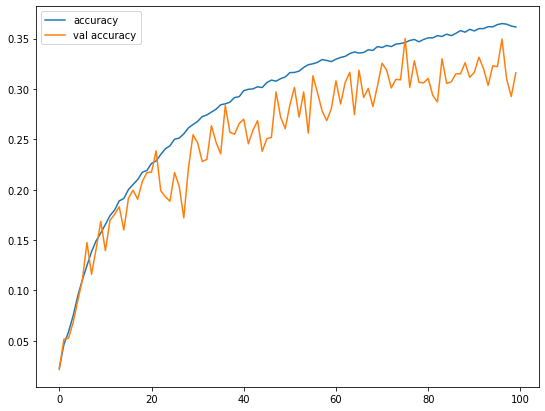

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

plt.plot(model.history.history['accuracy'],label = 'accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'val accuracy')

plt.legend()
plt.show()